In [12]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta

In [8]:
yf.pdr_override()

In [10]:
def first_business_day(date):
#     if date.day > 25:
#         date += timedelta(7)
    month = date.replace(day=1)
    if month.weekday() > 4:
        month = date.replace(day=(8 - month.weekday()))
    return month.strftime("%Y-%m-%d")

In [20]:
end_date = (datetime.now() + timedelta(1)).strftime("%Y-%m-%d")
month = first_business_day(date.today())
three_month = first_business_day((date.today() + relativedelta(months=-3)))
six_month = first_business_day((date.today() + relativedelta(months=-6)))
now = datetime.now()
monday = (now - timedelta(days = now.weekday())).strftime("%Y-%m-%d")
start_date = '{}-01-01'.format(date.today().year - 1)

In [27]:
monday = '2020-09-08'

In [49]:
acoes = {
    'BBDC4': 0.21,
    'TOTS3': 0.2,
    'ITSA4': 0.13,
    'LIGT3': 0.11,
    'CSNA3': 0.08,
    'STBP3': 0.07,
    'SUZB3': 0.07,
    'ENEV3': 0.07,
    'CIEL3': 0.06
}

# Meus fundos
# fundos = {
#     'GGRC11': 0.25,
#     'HGRU11': 0.23,
#     'VILG11': 0.22,
#     'IRDM11': 0.2,
#     'LVBI11': 0.11
# }

# Funds Explorer
fundos = {
    'HGBS11': 0.047,
    'HGRE11': 0.1103,
    'VRTA11': 0.1335,
    'GGRC11': 0.1060,
    'XPML11': 0.0573,
    'IRDM11': 0.1512,
    'HGRU11': 0.1037,
    'VILG11': 0.1668,
    'RBRP11': 0.0758,
    'XPSF11': 0.0507
}

In [3]:
def add_value(key, value, dict_to_add):
    if key in dict_to_add:
        dict_to_add[key] += value
    else:
        dict_to_add[key] = value

In [4]:
def plot(values):
    plt.pie(values.values(), labels=values.keys(), autopct='%1.1f%%')

In [38]:
def print_values(empresas):
    empresas = [x + '.SA' for x in empresas]
    data = pdr.get_data_yahoo(empresas, start=start_date, end=end_date)['Close']
    df_mean = pd.DataFrame()
    for empresa in empresas:
        valor_ano = round(data.iloc[0][empresa], 2)
        valor_seis_meses = round(data.iloc[data.index.get_loc(six_month,method='nearest')][empresa], 2)
        valor_tres_meses = round(data.iloc[data.index.get_loc(three_month,method='nearest')][empresa], 2)
        valor_mes = round(data.loc[month][empresa], 2)
        valor_semana = round(data.loc[monday][empresa], 2)
        valor_ontem = round(data.iloc[-2][empresa], 2)
        valor_hoje = round(data.iloc[-1][empresa], 2)

        percent_ano = round((((valor_hoje - valor_ano) / valor_ano) * 100), 2)
        percent_seis_meses = round((((valor_hoje - valor_seis_meses) / valor_seis_meses) * 100), 2)
        percent_tres_meses = round((((valor_hoje - valor_tres_meses) / valor_tres_meses) * 100), 2)
        percent_mes = round((((valor_hoje - valor_mes) / valor_mes) * 100), 2)
        percent_semana = round((((valor_hoje - valor_semana) / valor_semana) * 100), 2)
        percent_hoje = round((((valor_hoje - valor_ontem) / valor_ontem) * 100), 2)
        line = pd.Series({
            'inicio_ano': valor_ano,
            'inicio_seis_meses': valor_seis_meses,
            'inicio_tres_meses': valor_tres_meses,
            'inicio_mes': valor_mes,
            'inicio_semana': valor_semana,
            'hoje': valor_hoje,
            'percent_ano': percent_ano,
            'percent_seis_meses': percent_seis_meses,
            'percent_tres_meses': percent_tres_meses,
            'percent_mes': percent_mes,
            'percent_semana': percent_semana,
            'percent_hoje': percent_hoje
        }, name=empresa)
        df_mean = df_mean.append(line)
    print(df_mean)

In [43]:
empresas = pd.read_csv('empresas_b3.csv', sep=';', encoding = "ISO-8859-1")

BBDC4 => Bancos
TOTS3 => Programas e Serviços
ITSA4 => Bancos
LIGT3 => EQTL PARA EQPA
CSNA3 => Siderurgia
STBP3 => Serviços de Apoio e Armazenagem
SUZB3 => Papel e Celulose
ENEV3 => Energia Elétrica
CIEL3 => Serviços Financeiros Diversos
[*********************100%***********************]  291 of 291 completed

12 Failed downloads:
- CBSC.SA: No data found, symbol may be delisted
- GAFL.SA: No data found, symbol may be delisted
- SLCT.SA: No data found, symbol may be delisted
- CMSA.SA: No data found, symbol may be delisted
- SNST.SA: No data found, symbol may be delisted
- GAIA.SA: No data found, symbol may be delisted
- CALI.SA: No data found, symbol may be delisted
- MA.SA: No data found, symbol may be delisted
- BSCS.SA: No data found, symbol may be delisted
- ALGT.SA: No data found, symbol may be delisted
- APTI.SA: No data found, symbol may be delisted
- SPRT.SA: No data found, symbol may be delisted
           hoje  inicio_ano  inicio_mes  inicio_seis_meses  inicio_semana  \
CSAN

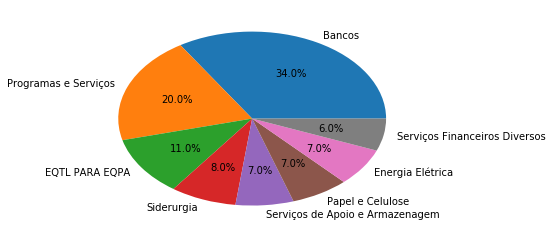

In [48]:
if acoes:
    empresas = pd.read_csv('empresas_b3.csv', sep=';', encoding = "ISO-8859-1")
    porcentagens = {}
    for acao in acoes.keys():
        valores = empresas[empresas['Código'] == acao].Setor.values
        if valores:
            add_value(valores[0], acoes[acao], porcentagens)
            print('{} => {}'.format(acao, valores[0]))
        else:
            add_value('Outros', acoes[acao], porcentagens)
            print('{} => {}'.format(acao, 'Outros'))
    plot(porcentagens)
    print_values(list(empresas['Código']))

HGBS11 => Shoppings
HGRE11 => Imóveis Comerciais
VRTA11 => Papéis
GGRC11 => Imóveis Industriais e Logísticos
XPML11 => Shoppings
IRDM11 => Papéis
HGRU11 => Educacional
VILG11 => Imóveis Industriais e Logísticos
RBRP11 => Outros
XPSF11 => Outros
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  10 of 10 completed
             hoje  inicio_ano  inicio_mes  inicio_seis_meses  inicio_semana  \
HGBS11.SA  212.89      237.40      212.50             280.72         210.99   
HGRE11.SA  152.50      147.70      150.90             179.00         151.91   
VRTA11.SA  104.15      116.91      104.21             126.80         104.49   
GGRC11.SA  144.50      136.62      144.28             137.23         143.99   
XPML11.SA  109.00      108.58      108.07             133.99         107.75   
IRDM11.SA  117.86      111.00      116.52             123.50         118.00   
HGRU11.SA  132.88      103.51      131.01             130.60  

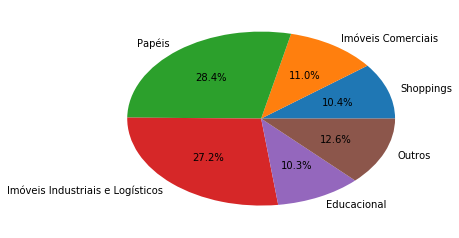

In [50]:
if fundos:
    empresas = pd.read_json('ifix.json')
    porcentagens = {}
    for fundo in fundos.keys():
        valores = empresas[empresas['Código'] == fundo].Setor.values
        if valores:
            add_value(valores[0], fundos[fundo], porcentagens)
            print('{} => {}'.format(fundo, valores[0]))
        else:
            add_value('Outros', fundos[fundo], porcentagens)
            print('{} => {}'.format(fundo, 'Outros'))
    data = pdr.get_data_yahoo('IFIX.SA', start=start_date, end=end_date)
    plot(porcentagens)
    print_values(fundos.keys())